<a href="https://colab.research.google.com/github/Hubert246/Data-Science-Bootcamp/blob/main/07_machine_learning/06_regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

Text(0.5, 1.0, 'Sigmoid Function')

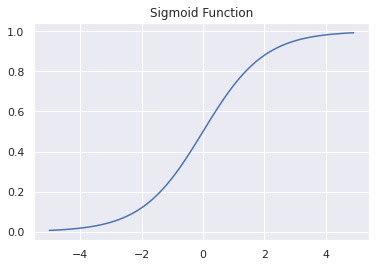

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

sns.set()
np.random.seed(10)
np.set_printoptions(precision=6, suppress=True)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.arange(-5, 5, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.title('Sigmoid Function')

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data)

{'data': array([[ 17.99   ,  10.38   , 122.8    , ...,   0.2654 ,   0.4601 ,
          0.1189 ],
       [ 20.57   ,  17.77   , 132.9    , ...,   0.186  ,   0.275  ,
          0.08902],
       [ 19.69   ,  21.25   , 130.     , ...,   0.243  ,   0.3613 ,
          0.08758],
       ...,
       [ 16.6    ,  28.08   , 108.3    , ...,   0.1418 ,   0.2218 ,
          0.0782 ],
       [ 20.6    ,  29.33   , 140.1    , ...,   0.265  ,   0.4087 ,
          0.124  ],
       [  7.76   ,  24.54   ,  47.92   , ...,   0.     ,   0.2871 ,
          0.07039]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
X = data.data
y = data.target

print(f'shape X: {X.shape}')
print(f'shape Y {y.shape}')

shape X: (569, 30)
shape Y (569,)


In [6]:
df = pd.DataFrame(data=X, columns=data.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


In [9]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [10]:
y_prob = classifier.predict_proba(X_test)
y_prob

array([[0.994202, 0.005798],
       [0.000072, 0.999928],
       [0.002078, 0.997922],
       [0.999792, 0.000208],
       [0.00318 , 0.99682 ],
       [0.015106, 0.984894],
       [0.000178, 0.999822],
       [0.946027, 0.053973],
       [1.      , 0.      ],
       [0.986498, 0.013502],
       [0.000081, 0.999919],
       [0.000298, 0.999702],
       [0.586489, 0.413511],
       [0.000823, 0.999177],
       [0.99966 , 0.00034 ],
       [0.999086, 0.000914],
       [0.000669, 0.999331],
       [0.05774 , 0.94226 ],
       [0.028585, 0.971415],
       [0.998329, 0.001671],
       [0.666191, 0.333809],
       [0.139381, 0.860619],
       [0.003033, 0.996967],
       [0.052679, 0.947321],
       [1.      , 0.      ],
       [1.      , 0.      ],
       [0.07826 , 0.92174 ],
       [1.      , 0.      ],
       [0.001151, 0.998849],
       [0.016128, 0.983872],
       [0.0012  , 0.9988  ],
       [0.008401, 0.991599],
       [1.      , 0.      ],
       [0.000895, 0.999105],
       [0.0185

In [11]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

Accuracy: 0.9230769230769231


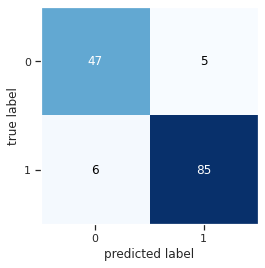

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
sns.set()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.89      0.90      0.90        52
      benign       0.94      0.93      0.94        91

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

